In [1]:
from act.cell_model import TargetCell, TrainCell
from act.simulator import Simulator
from act.act_types import SimulationParameters
# /Users/vladimiromelyusik/ACT/data/Burster/Izhikevich_p307_orig/template.hoc
# /Users/vladimiromelyusik/ACT/data/Burster/Izhikevich_p307_orig/modfiles
hoc_file = "/home/mwsrgf/proj/ACT/data/Burster/Izhikevich_p307_orig/template.hoc"
mod_folder = "/home/mwsrgf/proj/ACT/data/Burster/Izhikevich_p307_orig/modfiles"

/home/mwsrgf/act-venv/lib64/python3.9/site-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)
--No graphics will be displayed.


### 1. Generate target data

In [2]:
# Init the cell
target_cell = TargetCell(
    hoc_file = hoc_file,
    mod_folder= mod_folder,
    cell_name = "Burster_Izh",
    g_names = ["gbar_nap", "gkdrbar_kdr", "gbar_na3", "gmbar_im", "glbar_leak"]
)

current_intensities = [0.1, 0.2, 0.3]

In [3]:
# Simulate a voltage trace
simulator = Simulator()
for i in range(len(current_intensities)):
    simulator.submit_job(
        target_cell,
        SimulationParameters(
            sim_name = "target1",
            sim_idx=i,
            h_v_init = -70, # (mV)
            h_tstop = 300,  # (ms)
            h_dt = 0.01, # (ms)
            h_celsius = 37, # (deg C)
            CI = {
                "type": "constant",
                "amp": current_intensities[i],
                "dur": 290,
                "delay": 10
            }
        )
    )
# simulator.submit_job(...)
# simulator.submit_job(...)

In [4]:
# Run
simulator.run(mod_folder)

from act.DataProcessor import DataProcessor
dp = DataProcessor()
dp.combine_data("./model/target1")


Total number of jobs: 3
Total number of proccessors: 192


In [5]:
import numpy as np
dataset = np.load("./model/target1/combined_out.npy")

dp = DataProcessor()
g = dp.clean_g_bars(dataset)

print(dataset[:,:,1])

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 

### 2. Generate simulated data

#### Get Passive Properties

Total number of jobs: 1
Total number of proccessors: 192
MECHANISMS already loaded.
Found 1 section(s) in this cell. Calculating the total surface area of the cell.


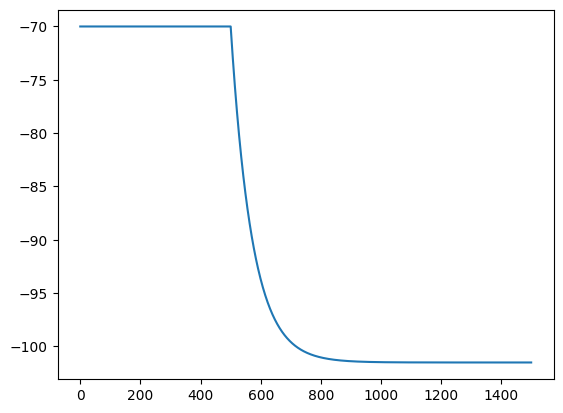

In [6]:
# Predict passive properties
from act.DataProcessor import DataProcessor
from act.cell_model import TrainCell
import matplotlib.pyplot as plt
import numpy as np

# Init the cell
train_cell = TrainCell(
    hoc_file = hoc_file,
    mod_folder= mod_folder,
    cell_name = "Burster_Izh",
    g_names = ["gbar_nap", "gkdrbar_kdr", "gbar_na3", "gmbar_im", "glbar_leak"]
)

# Simulate a negative current injection and get all of the data needed to calculate the passive properties.
# This is a stand in for data from a target cell.
dp = DataProcessor()
(
V,
dt, 
h_tstop, 
I_tstart, 
I_intensity,
cell_area
) = dp.simulate_negative_CI(train_cell, "glbar_leak")

plt.plot(V)

In [7]:
dp = DataProcessor()
props = dp.calculate_passive_properties(V, dt,h_tstop,I_tstart,I_intensity,cell_area,"glbar_leak")

print(props)

{'leak_conductance_variable': 'glbar_leak', 'g_bar_leak': 3.500002954275104e-05, 'r_in': 315.19618835592127, 'tau': 72.0, 'v_rest': -70.0, 'Cm': 0.2284291582825145}


In [8]:
from act.cell_model import TrainCell

# Init the cell
train_cell = TrainCell(
    hoc_file = hoc_file,
    mod_folder= mod_folder,
    cell_name = "Burster_Izh",
    g_names = ["gbar_nap", "gkdrbar_kdr", "gbar_na3", "gmbar_im", "glbar_leak"]
)
'''
{"channel": "gbar_nap", "high": 0.0006, "low": 0.0001},
{"channel": "gmbar_im", "high": 0.0033, "low": 0.00066667},
{"channel": "gbar_na3", "high": 0.06, "low": 0.01},
{"channel": "gkdrbar_kdr", "high": 0.056, "low": 0.01},
'''
channel_ranges = [
    (0.0001, 0.0006),  
    (0.01, 0.056),
    (0.01, 0.06),
    (0.00066667, 0.0033),
    (props['g_bar_leak'],props['g_bar_leak']) # We know this conductance
]
channel_samples = [2, 3, 2, 2, 1]
#current_intensities = [0.1, 0.2, 0.3] # same as target_cell. comment out if wanting one control spot
conductance_groups, current_settings = train_cell.generate_I_g_combinations(channel_ranges, channel_samples, current_intensities)

In [9]:
print(len(conductance_groups))
print(conductance_groups[0])
print(conductance_groups[71])


72
(0.0001, 0.01, 0.01, 0.00066667, 3.500002954275104e-05)
(0.0006, 0.056, 0.06, 0.0033, 3.500002954275104e-05)


In [10]:
# Simulate voltage traces
simulator = Simulator()

for i in range(len(conductance_groups)):
        # Set parameters from the grid
        train_cell.set_g(["gbar_nap", "gkdrbar_kdr", "gbar_na3", "gmbar_im", "glbar_leak"], conductance_groups[i])
        simulator.submit_job(
            train_cell, 
            SimulationParameters(
                sim_name = "train1",
                sim_idx = i,
                h_v_init = -70, # (mV)
                h_tstop = 300,  # (ms)
                h_dt = 0.01, # (ms)
                h_celsius = 37, # (deg C)
                CI = {
                    "type": "constant",
                    "amp": current_settings[i],
                    "dur": 290,
                    "delay": 10
                }
            )
        )
# simulator.submit_job(...)
# simulator.submit_job(...)

In [12]:
# Run
simulator.run(mod_folder)

from act.DataProcessor import DataProcessor
dp = DataProcessor()
dp.combine_data("./model/train1")

Total number of jobs: 72
Total number of proccessors: 192
MECHANISMS already loaded.


In [ ]:
# MatchFilter will go over saved data and create a dataset of the traces that match,
# deleting others

## 3. Train the model

In [15]:
import numpy as np
from act.DataProcessor import DataProcessor
dataset_train = np.load("./model/train1/combined_out.npy")

dp = DataProcessor()
g_train = dp.clean_g_bars(dataset_train)
V_train = dataset_train[:,:,0]
I_train = dataset_train[:,:,1]

features_train, columns_train = dp.extract_features(V=V_train,I=I_train,inj_dur=290,inj_start=10)

print(f"columns_train: {columns_train}")
print(features_train.shape)

-------------------------------------------------
GENERATING ARIMA STATS
-------------------------------------------------
ARIMA order set to (4, 0, 4)


  0%|          | 0/72 [00:00<?, ?it/s]/home/mwsrgf/act-venv/lib64/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mwsrgf/act-venv/lib64/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mwsrgf/act-venv/lib64/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mwsrgf/act-venv/lib64/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters

columns_train: ['I_mean', 'I_stdev', 'Num Spikes', 'Interspike Interval', 'Avg Min Spike Height', 'Avg Max Spike Height', 'V_mean', 'amplitude', 'frequency', 'arima0', 'arima1', 'arima2', 'arima3', 'arima4', 'arima5', 'arima6', 'arima7', 'arima8', 'arima9']
torch.Size([72, 19])


In [16]:
import numpy as np
from act.DataProcessor import DataProcessor
dataset_target = np.load("./model/target1/combined_out.npy")

dp = DataProcessor()
g_target = dp.clean_g_bars(dataset_target)
V_target = dataset_target[:,:,0]
I_target = dataset_target[:,:,1]

features_target, columns_target = dp.extract_features(V=V_target,I=I_target,inj_dur=290,inj_start=10)

print(f"columns_tar: {columns_target}")
print(features_target.shape)

-------------------------------------------------
GENERATING ARIMA STATS
-------------------------------------------------
ARIMA order set to (4, 0, 4)


  0%|          | 0/3 [00:00<?, ?it/s]/home/mwsrgf/act-venv/lib64/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mwsrgf/act-venv/lib64/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mwsrgf/act-venv/lib64/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mwsrgf/act-venv/lib64/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

columns_tar: ['I_mean', 'I_stdev', 'Num Spikes', 'Interspike Interval', 'Avg Min Spike Height', 'Avg Max Spike Height', 'V_mean', 'amplitude', 'frequency', 'arima0', 'arima1', 'arima2', 'arima3', 'arima4', 'arima5', 'arima6', 'arima7', 'arima8', 'arima9']
torch.Size([3, 19])


In [19]:
# Fitting Random Forest
from act.optimizer import RandomForestOptimizer

rf = RandomForestOptimizer()
rf.fit(features_train.cpu().numpy(),g_train)

In [20]:
prediction = rf.predict(features_train.cpu().numpy())

In [21]:
print(prediction)

[[3.51147925e-04 2.50354457e-02 1.09063014e-02 1.68769811e-03
  3.50000295e-05]
 [3.62060043e-04 2.34803970e-02 1.06997829e-02 1.60591642e-03
  3.50000295e-05]
 [3.32447266e-04 3.00657539e-02 5.92816230e-02 2.19309038e-03
  3.50000295e-05]
 [3.23596889e-04 3.05578476e-02 5.92678299e-02 2.25412095e-03
  3.50000295e-05]
 [3.00793256e-04 3.33740537e-02 1.13166223e-02 1.75483210e-03
  3.50000295e-05]
 [2.99920591e-04 3.19335561e-02 1.12088091e-02 1.73980025e-03
  3.50000295e-05]
 [3.08447801e-04 2.96431889e-02 1.10173192e-02 1.69480881e-03
  3.50000295e-05]
 [2.54082214e-04 3.50513665e-02 2.49451084e-02 2.53158812e-03
  3.50000295e-05]
 [2.67193075e-04 3.36640965e-02 2.02954455e-02 2.50797045e-03
  3.50000295e-05]
 [3.35701855e-04 3.42348592e-02 1.14321219e-02 2.34159865e-03
  3.50000295e-05]
 [3.35632166e-04 3.49041845e-02 5.94102438e-02 1.93135864e-03
  3.50000295e-05]
 [3.23307399e-04 3.63665685e-02 5.94096460e-02 1.79278740e-03
  3.50000295e-05]
 [3.62924812e-04 2.21294294e-02 1.062048